In [1]:
import euroleague as e
import matplotlib.pyplot as plt

# Get data

In [2]:
# fetch teams stats data using the euoleague module
seasons_rounds = {2018: 30, 2019: 18}
teams_stats = e.get_teams_stats(seasons_rounds)

# create a columns for highlighting teams in plots
teams_stats['isMTA'] = teams_stats['team'].mask(cond=~(teams_stats['team'] == 'MTA'))

# create a subset of team_stats with only 2019/20 season data
teams_stats_2019 = teams_stats.loc[teams_stats['season'] == 2019]

# Net Rating compared to other teams and previous season

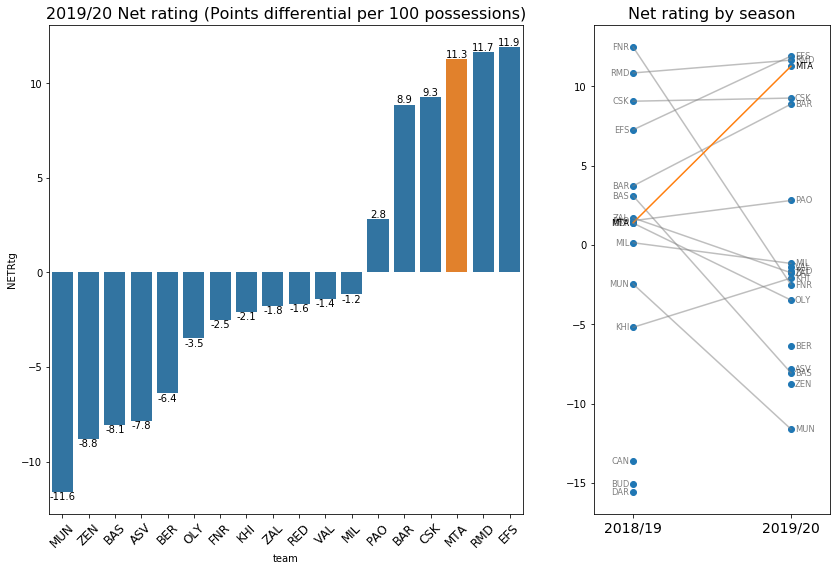

In [3]:
# set up subplots figure and axes
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 9), gridspec_kw={'width_ratios': [2, 1]})

# plot net rating for teams in 2019/20
e.sorted_barplot(df=teams_stats_2019, metric='NETRtg', marked_teams=['MTA'], ax=ax0);
ax0.set_title('2019/20 ' + ax0.get_title(), fontsize=16);

# compare net rating of teams between 2018/19 and 2019/20
e.plot_parallel_pairs(df=teams_stats, metrics=['NETRtg'], marked_iv_values=['MTA'], ax=ax1)
ax1.set_title('Net rating by season', fontsize=16);

<font size="4.5">
<li>Maccabi has the 2nd best net rating this season</li><br>
<li>Improved by about 10 points since last season, where they had average net rating</li>
</font>

# Offensive VS Defensive Rating

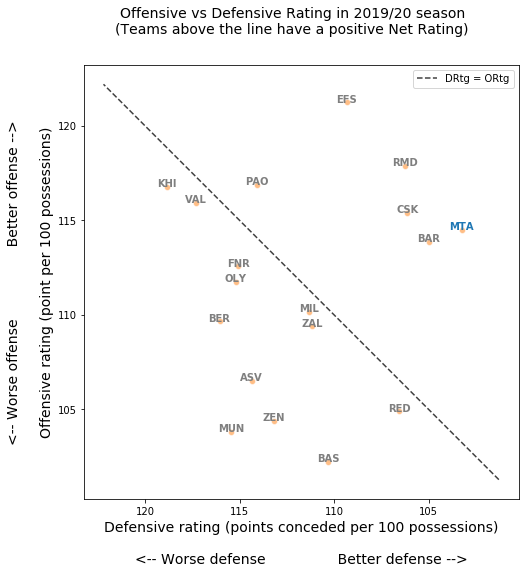

In [4]:
# plot offensive vs defensive rating in 2019/20
title_suffix = '\n(Teams above the line have a positive Net Rating)'
xlabel_suffix = '\n\n<-- Worse defense\t\t\t\tBetter defense -->'.replace('\t', '    ')
ylabel_prefix = '<-- Worse offense\t\t\t\tBetter offense -->\n\n'.replace('\t', '    ')

fig, ax = e.plot_bivariate(
    df=teams_stats_2019, x='DRtg', y='ORtg', hue='isMTA', xyline=True,
    show_season=False, dont_annotate_hue_na=False, 
    suptitle='Offensive vs Defensive Rating in 2019/20 season' + title_suffix
);
ax.set_xlabel(ax.get_xlabel() + xlabel_suffix); 
ax.set_ylabel(ylabel_prefix + ax.get_ylabel());
ax.invert_xaxis()

<font size="3.5">* note that the x axis is reversed so more to the right means better defense</font><br>
<font size="4.5"><br>
<li>Maccabi's high net rating comes mainly from defense</li><br>
<li>Maccabi's defensive rating is the best in the league this season</li><br>
<li>Maccabi's offensive rating is slightly above average</li><br>
</font>

# Defensive rating compared to other teams and previous season

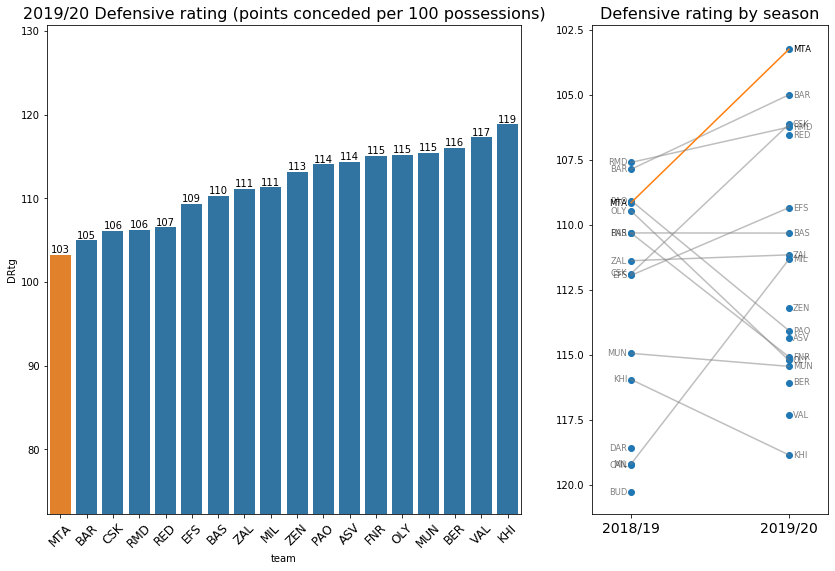

In [5]:
# set up subplots figure and axes
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 9), gridspec_kw={'width_ratios': [2, 1]})

# plot defensive ratings for teams in 2019/20
e.sorted_barplot(df=teams_stats_2019, metric='DRtg', marked_teams=['MTA'], ax=ax0);
ax0.set_title('2019/20 ' + ax0.get_title(), fontsize=16);

# compare teams defensive rating between 2018/19 and 2019/20
e.plot_parallel_pairs(df=teams_stats, metrics=['DRtg'], marked_iv_values=['MTA'], ax=ax1)
ax1.set_title('Defensive rating by season', fontsize=16);
ax1.invert_yaxis()

<font size="3.5">* note that on the right plot, the y axis is reversed so higher means better defense</font><br>
<font size="4.5"><br>
<li>Maccabi concede less than 103 points per 100 possessions</li><br>
<li>Last season they had a defensive rating of over 109, which was also relatively good</li><br>
</font>

# A deeper look into defensive metrics

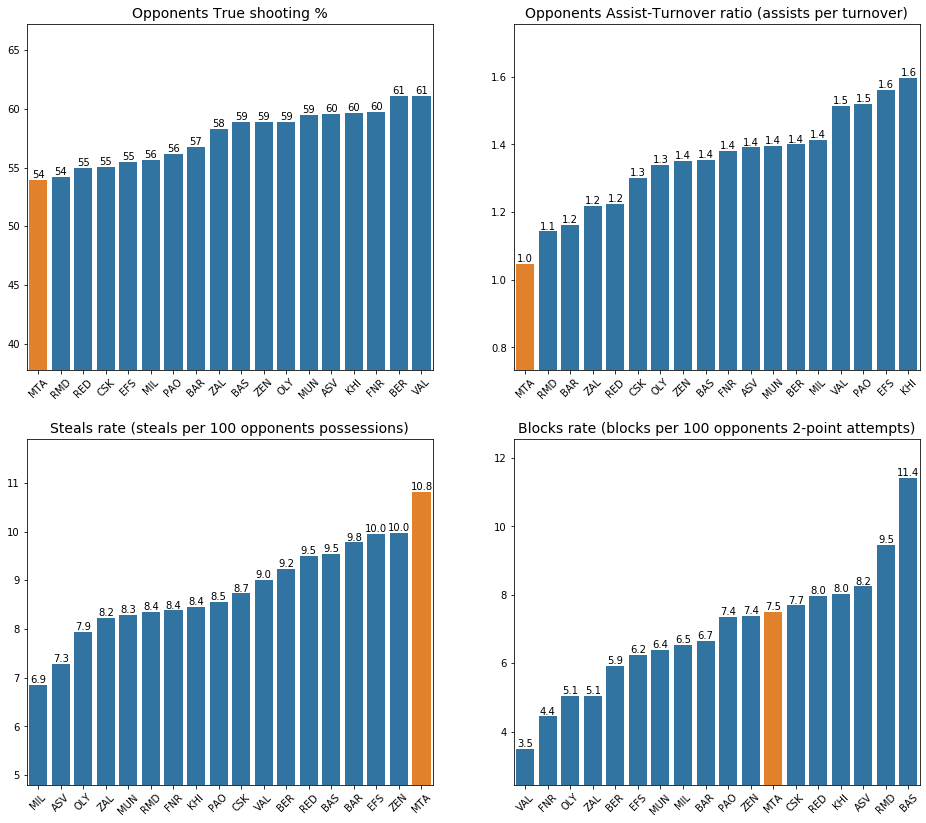

In [6]:
defensive_metrics = ['OP_TS%', 'OP_AST-TOV_R', 'STLR', 'BLKR']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))

for facet_num, metric in enumerate(defensive_metrics):
    curr_ax = axes.ravel()[facet_num]
    e.sorted_barplot(
        df=teams_stats_2019, metric=metric, marked_teams=['MTA'], ax=curr_ax,
        title_size=14, tick_fontsize=10
    );
    curr_ax.set_xlabel('')
    curr_ax.set_ylabel('')

<font size="4.5"><br>
<li>Assist-Turnover ratio: Maccabi's opponents make only 1 assist per turnover, which is the best in the league by far</li><br>
<li>True shooting %: Maccabi's opponents have only 54% true shooting, which is the best in the league</li>
<font size="3.5"><li style="margin-left:2em">True shooting % measures shooting efficiency from 2-point and 3-point field goals and from free throws, with propoer adjustments</li><br></font>
<li>Steals rate: Maccabi's defense steal balls on 11% of possessions, highest in the league by far</li><br>
<li>Blocks rate: Maccabi's defense block shots on 7.5% of opponents 2-points attempts, which is slightly above average</li><br>
</font>